# EN.553.436/646 Exam 1 (20 pts.)
## Guidelines
syntax is insufficient.- The test is open note and open internet, but do not communicate with anyone.
- When you are ready to start, record your start time.
- Finish the exam within a 75-minute time interval.
- When you are finished, complete the honor statement and upload your IPYNB and PDF to Canvas.
- The latest you may submit the test is 1:30pm, so plan your start time accordingly.
- Some questions ask for text responses. The graders will be looking for brief, incisive remarks that indicate depth of understanding. For commenting code, a literal description of the 

# <span style="color:red"> Honor Statement: </span>
This work was done entirely by me within the 75-minute time limit. I have not discussed test content with any other student and I will not do so during the test period.
## Signature: Amir Hossein Daraie
## Start Time: 10:45
## End Time: 12:00

# Dataset
Simon is employed by a bureau of civil engineering. He is analyzing the [Concrete Compressive Strength Dataset](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength) stored in `concrete.csv`. His goal is to assess the relation of eight attributes of concrete to the compressive strength of the concrete. 

Read and run the following code cell.

In [1]:
import pandas as pd

data = pd.read_csv("concrete.csv")
display(data)

# Predictors: attribtues of concrete.
X = data.iloc[:,:-1]
# Target: compressive strength.
y = data.iloc[:,-1]

,Cement[kg/m^3],Slag[kg/m^3],SlyAsh[kg/m^3],Water[kg/m^3],Superplasticizer[kg/m^3],CoarseAggregate[kg/m^3],FineAggregate[kg/m^3],Age[Day],Strength[MPa]
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# 1 (4 pts.)
0. Run the following code cell. 
1. Where indicated, name the method Simon is attempting to implement. (1 pt.) 
2. Where indicated, write a brief comment explaining the intent of the following code. (2 pts.)
3. In the Markdown cell below, give a brief, qualitative description of the distribution of `y` based on the plot. (1 pt.)

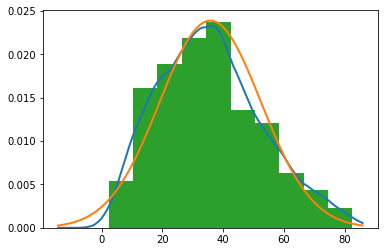

In [2]:
# METHOD: Kernel Density Estimation 

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# COMMENT: Implementation of Kernel Function
def K(u):
    return (3/4)*(1-u**2)*(np.abs(u)<=1)

# COMMENT: Implementation of Kernel Function when we specify the width of the bins to be equal to `h`
def Kh(u, h):
    return (1/h)*K(u/h)

# COMMENT: Compute KDE Function on the variable y over the indices u, which are 100 indices from 
# -3 standard deviation of `y` up to 3 standard deviation of `y`.
def f(u, h):
    tmp = 0
    for y_i in y:
        tmp += Kh(u-y_i, h)
    return tmp/len(y)

# COMMENT: Compare three functions by plotting them on a same figure: 
# Functions are: 1. KDE of y using Kernel function Kh, where h is the width of each bin
#                2. PDF of Normal Distribution with mean of `y` and standard deviation of `std(y)`. 
#                3. Histogram function of `y` with 10 bins and area under the curve of 1, thus it is normalized.
u = np.linspace(np.mean(y)-3*np.std(y), np.mean(y)+3*np.std(y), 100)
plt.plot(u, f(u,10),linewidth=2)
plt.plot(u, stats.norm(loc=np.mean(y), scale=np.std(y)).pdf(u), linewidth=2)
plt.hist(y, density=True, bins=10)
plt.show()

## <span style="color:red">1.3 Description:</span> 

In this question, after implementing Kernel Function with a specific bin width, we compute the kernel density estimation of y given our defined kernel `Kh`. Also we Compute the PDF of Normal Distribution with mean of `y` and standard deviation of `std(y)`. And finally we compute the normalized (kernel) histogram function of `y` with 10 bins.

After comparing these three functions by plotting them on a same figure, we can infer some knowledge about the distribution of our data `y`. We can see that the distribution of y is skewed to the left left (lower) values that the mean. Despite being equal to some values of normal distribution, there are many deviations from normal values, the lower half of the data is mostly higher than the normal values, and the higher half of the data data is mostly lower that the values of normal distribution.

# 2 (8 pts.)
0. Run the following code cell. 
1. Where indicated, name the method Simon is attempting to implement. (1 pt.) 
2. Where indicated, write a brief comment explaining the intent of the following code. (2 pts.)
3. Simon made a comment at the bottom of the code cell. Explain that comment in the Markdown cell that follows. (3 pts.)
4. There is a mistake in the code. Fix the mistake by modifying exactly one line. Comment your correction. Run the cell to get the correct output. (2 pts.)

0.32576816350544285


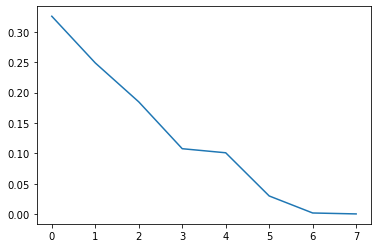

In [3]:
# METHOD: Principle Component Analysis (PCA)

# COMMENT: Compute the sample covariance matrix of the data matrix `X`. 
S = (X-X.mean()).T @ (X-X.mean()) / (X.shape[0]-1)
# COMMENT: Compute the eigen value decomposition of covatiance matrix.
w, v = np.linalg.eigh(S) 
# SIMON: Sorts array in descending order. It was in ascending order by default.
w = np.flip(w)
# COMMENT: Compute the proportion of highest (first) eigenvalue to the summation of all eigenvalues.
print(w[0]/np.sum(w))
# COMMENT: Plot the eigenvalues, for plotting, the correction I made is to subtract mean of each feature of X (column)
# from all the values in each column. I did this in the first line using broadcasting.
plt.plot(w/np.sum(w))
plt.show()

# SIMON: From the output, X is virtually one-dimensional!

## <span style="color:red">2.3 Explanation:</span> 

After plotting the scree plot, we see that X is not one dimensional. The total variance explained by each principle component is showed on the scree plot figure. This is clear, because we took out the mean of each feature, thus there would not be any domination of component because of high mean value. 

# 3 (8 pts.)
0. Read and run the following code cell. 
1. Where indicated, write a brief comment explaining the intent of the following code. (4 pts.)
2. In the indicated space in `assess`, write code that will perform a linear regression to fit the coefficients of a linear model to predict `y` given `M`. Apply the model to generate predictions `y_pred` as a function of `M`. Comment your code.  (4 pts.)

107.19723607486016


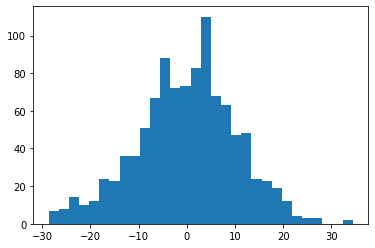

Running pca...
207.580441100365


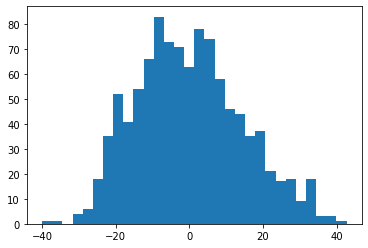

Running method augment_with_quadratic...
67.82392891282647


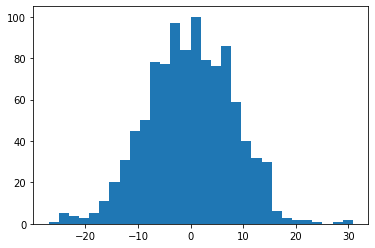

Running method augment_with_quadratic...
Running pca...
210.12488583372536


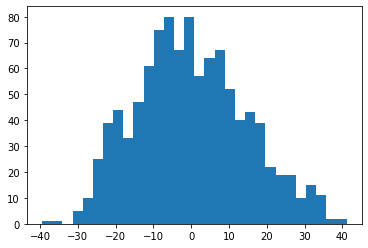

In [4]:
# METHOD: Linear Regression 

from sklearn.decomposition import PCA

# COMMENT: 
def setup(df, augment_with_quadratic=False, pca=False):
    M = df.values
    
    # COMMENT: Augment the data matrix M with multiplication of columns of data, two by two. 
    # Over a few iterations, we take all different permutations of columns (features), and append/augment them
    # to the main data matrix. The final M will have 36 columns after this augmentation.
    if augment_with_quadratic:
        print("Running method augment_with_quadratic...")
        for i in range(df.shape[1]-1):
            for j in range(i+1, df.shape[1]):
                M = np.hstack((M, M[:,i:(i+1)]*M[:,j:(j+1)]))
                                
    # COMMENT: Compute PCA of data matrix and only keep the first two principle components of data matrix. 
    if pca:
        print("Running pca...")
        pca = PCA(n_components=2)
        M = pca.fit_transform(M)
        
    # COMMENT: Add a column of ones that will correspond to the intercept of our linear regression model. 
    M = np.hstack((np.ones([M.shape[0], 1]), M))
    return M

# COMMENT: Compute and Plot the linear regression error of the calculated line and the ground truth data.
def assess(M):
    # this is placeholder to prevent error messages. you should overwrite y_pred with your linear regression code.
    # y_pred = np.zeros(y.shape)
    # COMPLETE CODE: Compute the linear regression using normal equation of Linear Regression. In linear regression 
    # analysis, the normal equations are a system of equations whose solution is the Ordinary Least Squares (OLS) 
    # estimator of the regression coefficients. The normal equations are derived from the first-order condition 
    # of the Least Squares minimization problem. It can also be considered psudo-inverse problem. 
    y_pred = M @ (np.linalg.inv(M.T@M)@M.T@y)[:,np.newaxis]
    # COMMENT: Compute the error, which is simply the difference of predicted value and real values. 
    e = y - np.squeeze(y_pred)
    print(np.mean(e**2))
    # COMMENT: Plot the histogram of error distribution using 30 bins.
    plt.hist(e, bins=30)
    plt.show() 
    return

# COMMENT: Compute the MSE error of Linear regression model and plot the error distribution for four different cases. 
# 1. The default data
# 2. The two first axes of PCA
# 3. The augmented matrix of the main data matrix
assess(setup(X))
assess(setup(X, pca=True))
assess(setup(X, augment_with_quadratic=True)) # 
assess(setup(X, augment_with_quadratic=True, pca=True) )
